In [7]:
import pyAudioAnalysis as paa
import pandas as pd

data_set = pd.read_csv('full_data_set_2018_09_06.csv') #, index_col = 'full_data_id')
full_data = data_set.drop(columns = ['full_data_id','Unnamed: 0']).set_index('id')
print(data_set.head())

   full_data_id  Unnamed: 0           id  \
0             0           0  w6DukrYK5wQ   
1             1           1  AhhEYe5Hczo   
2             2           2  TtMPL2PtHs4   
3             3           3  dqPf-Eoisxg   
4             4           4  LGfK1-PVPek   

                                               title  \
0                               ALMA - Chasing Highs   
1               Dabin - Hold (feat. Daniela Andrade)   
2         Tim Legend - Telescope (feat. Transviolet)   
3  ZHU & Karnaval Blues - Still Want U (Costa D R...   
4                            Allie X – Focus 💛Analog   

                  channelID     views   likes  dislikes  duration_secs  \
0  UC9-JQq0wxUBItLsBOI3PckA  35773447  251152     13389          210.0   
1  UC5nc_ZtjKW1htCVZVRxlQAQ   6387697   95501      1192          359.0   
2  UCSa8IUd1uEjlREMa21I3ZPQ    884983   11097       157          176.0   
3  UC07LXvJakNQAMN3Z3nWTI9A    287701    5728       122          309.0   
4  UCb1cXeayhg_La-C_saU76DA 

In [13]:
import pyAudioAnalysis as paa
import pickle

data_set = pickle.load(open('full_songs_df.pckl','rb'))
print(data_set.head())

                                                         title  \
id                                                               
w6DukrYK5wQ                               ALMA - Chasing Highs   
AhhEYe5Hczo               Dabin - Hold (feat. Daniela Andrade)   
TtMPL2PtHs4         Tim Legend - Telescope (feat. Transviolet)   
dqPf-Eoisxg  ZHU & Karnaval Blues - Still Want U (Costa D R...   
LGfK1-PVPek                            Allie X – Focus 💛Analog   

                            channelID     views   likes  dislikes  \
id                                                                  
w6DukrYK5wQ  UC9-JQq0wxUBItLsBOI3PckA  35773447  251152     13389   
AhhEYe5Hczo  UC5nc_ZtjKW1htCVZVRxlQAQ   6387697   95501      1192   
TtMPL2PtHs4  UCSa8IUd1uEjlREMa21I3ZPQ    884983   11097       157   
dqPf-Eoisxg  UC07LXvJakNQAMN3Z3nWTI9A    287701    5728       122   
LGfK1-PVPek  UCb1cXeayhg_La-C_saU76DA     64477    5719        31   

             duration_secs         dateUploaded      

In [3]:
import pickle
features_df = pickle.load(open('features_df.pckl', 'rb'))
features_df.set_index('id', drop = True)
print(features_df.head())

            id   zcr_mean energy_mean energy_entropy_mean  \
0  --zKrCUdZ1U  0.0855852    0.114673             3.07426   
1  -0BhYtZvea8   0.039743   0.0517046             3.13332   
2  -0huGsj5LLs  0.0285219   0.0696249             3.03411   
3  -0oZNWif_jk   0.044873    0.160804             3.09768   
4  -1H6usve0nY  0.0333456   0.0515201             2.96779   

  spectral_centroid_mean spectral_spread_mean spectral_entropy_mean  \
0               0.180236             0.191564              0.716687   
1               0.117816             0.167917               0.25298   
2               0.114677             0.174082              0.166653   
3               0.136962             0.182861              0.285205   
4               0.107674             0.166951              0.246218   

  spectral_flux_mean spectral_rolloff_mean    zcr_std energy_std  \
0          0.0113401              0.135049  0.0540405  0.0546794   
1          0.0109154             0.0563287  0.0261709  0.0454369   
2 

In [4]:
mean_features = features_df.iloc[:,1:9]
print(mean_features.head())

    zcr_mean energy_mean energy_entropy_mean spectral_centroid_mean  \
0  0.0855852    0.114673             3.07426               0.180236   
1   0.039743   0.0517046             3.13332               0.117816   
2  0.0285219   0.0696249             3.03411               0.114677   
3   0.044873    0.160804             3.09768               0.136962   
4  0.0333456   0.0515201             2.96779               0.107674   

  spectral_spread_mean spectral_entropy_mean spectral_flux_mean  \
0             0.191564              0.716687          0.0113401   
1             0.167917               0.25298          0.0109154   
2             0.174082              0.166653           0.011559   
3             0.182861              0.285205          0.0105734   
4             0.166951              0.246218          0.0103378   

  spectral_rolloff_mean  
0              0.135049  
1             0.0563287  
2             0.0303653  
3             0.0509308  
4             0.0491795  


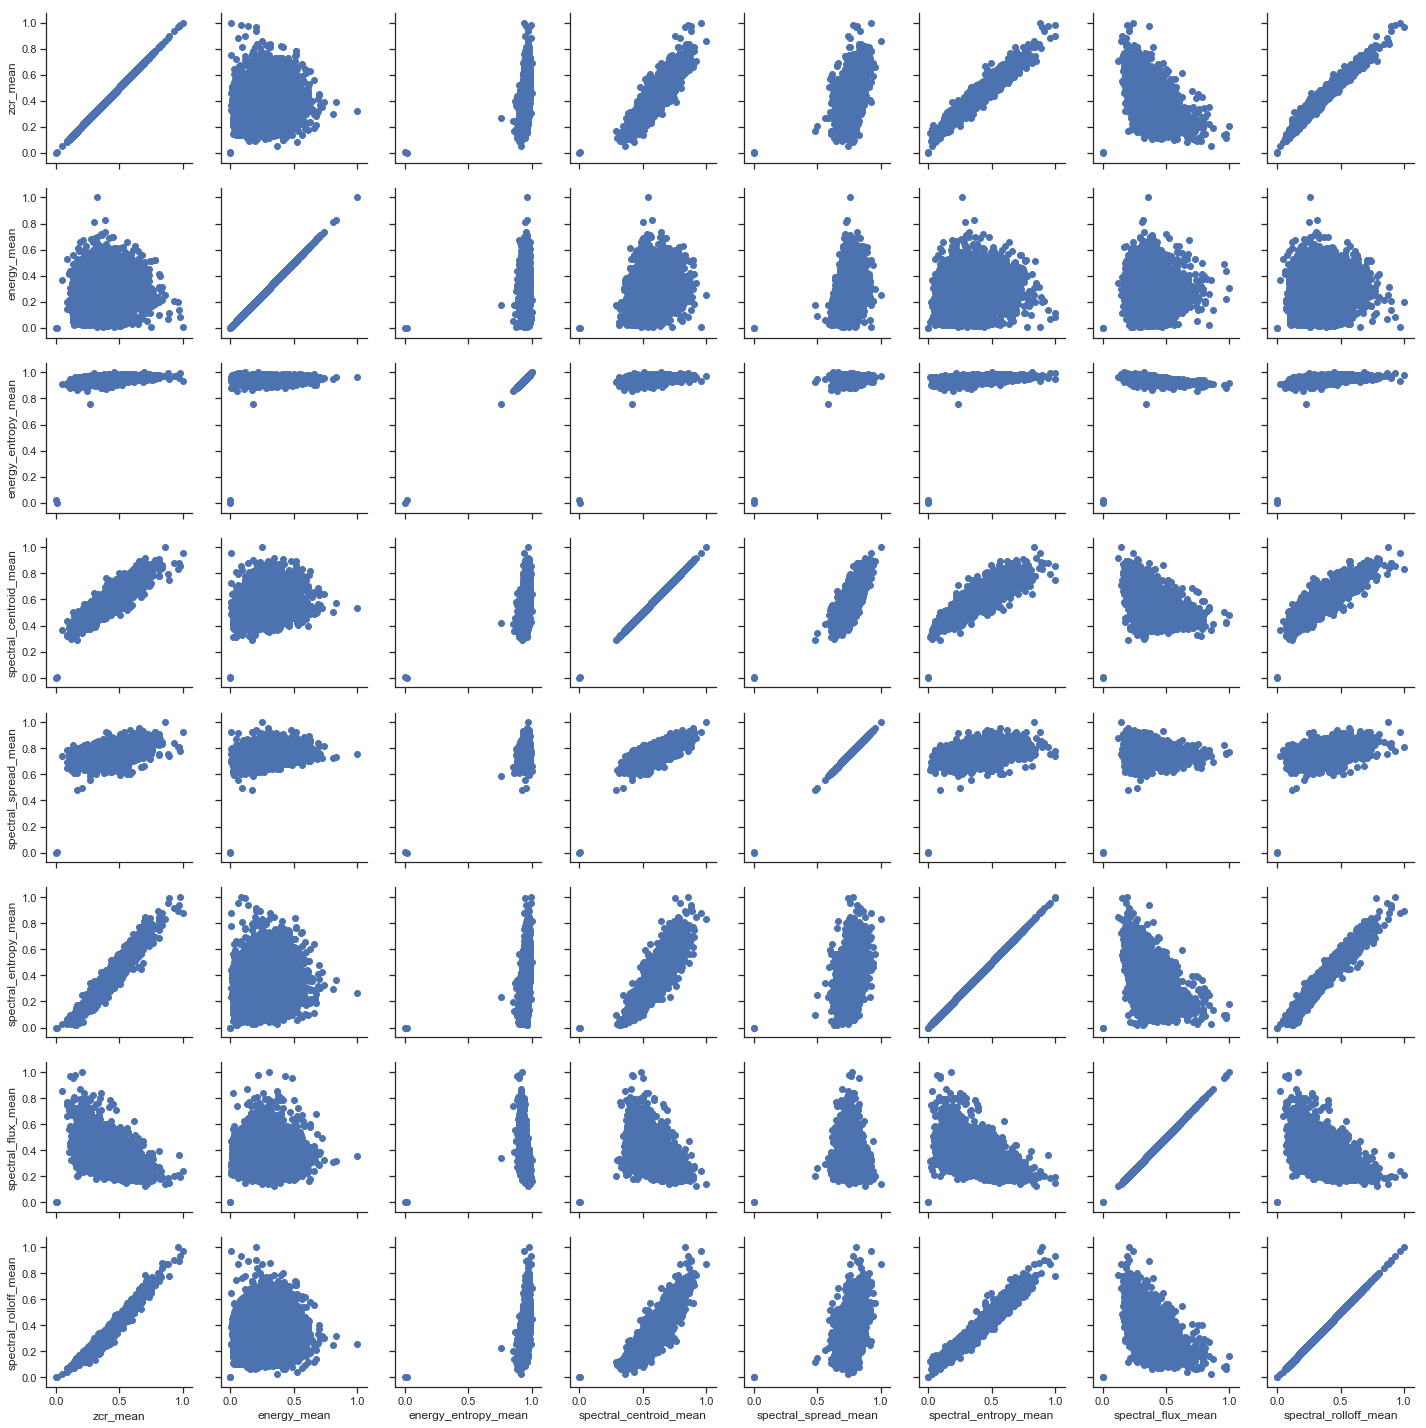

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style = 'ticks')

g = sns.PairGrid(mean_features)
g = g.map(plt.scatter)

In [23]:
for i in mean_features.columns:
    print(i, mean_features[i].max(), mean_features[i].min())

zcr_mean 0.9999999999999999 0.0
energy_mean 1.0 0.0
energy_entropy_mean 0.9999999999999998 0.0
spectral_centroid_mean 1.0000000000000002 0.0
spectral_spread_mean 1.0 0.0
spectral_entropy_mean 1.0 0.0
spectral_flux_mean 0.9999999999999999 0.0
spectral_rolloff_mean 1.0 0.0


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(mean_features) 
mean_features.loc[:,:] = scaled_values

C:\Users\tyler\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\tyler\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\tyler\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [41]:
mean_features = pd.DataFrame(features_df.iloc[:,0:9])
#mean_features = mean_features.set_index['id']
mean_features.head()

,id,zcr_mean,energy_mean,energy_entropy_mean,spectral_centroid_mean,spectral_spread_mean,spectral_entropy_mean,spectral_flux_mean,spectral_rolloff_mean
0,--zKrCUdZ1U,0.60664,0.452165,0.951038,0.730981,0.806022,0.566484,0.405247,0.542598
1,-0BhYtZvea8,0.281272,0.203805,0.969532,0.47314,0.70603,0.196573,0.390028,0.224358
2,-0huGsj5LLs,0.20163,0.274486,0.938463,0.460175,0.732098,0.127708,0.413092,0.119396
3,-0oZNWif_jk,0.317682,0.634113,0.95837,0.552229,0.769222,0.22228,0.377771,0.202536
4,-1H6usve0nY,0.235866,0.203077,0.917693,0.431246,0.701946,0.191179,0.369329,0.195456


In [33]:
import pickle
pickle.dump(features_df, open('features_df_norm.pckl','wb'))